# Binary Classification with k-Nearest Neighbor, Naive Bayes Classifier and Neural Network

The goal of this project is to understand three important binary classification methods, k-nearest beighbor, Naive Bayes Classifier and neural netowrk, by implementing them in Python from scratch (without using pre-defined packages such as scikit-learn). The dataset contains 683 patients with 9 biological features and benign or malignant breast cancer. The 16 data points with missing values were labeled with "?" and were already removed. The original data is avaiable from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

<br>


In this project, we want to predict whether or not a patient has malignant breast cancer by learning from the training set. we use the first 600 patients as training set, and the rest 83 as testing set (untouched during training). The performace of the two algorithms are indicated by the: 
<br>
<br>
accuracy: (how accurate the prediction is, (TP+TN)/(TP+TN+FP+FN));
<br>
precision: (out of the positve predictions, how much is correct, TP/(TP+FP));
<br>
recall: (how much of true positives are recovered, TP/(TP+FN)). 
<br>

Following is the dataset. 


In [2]:
import numpy as np
import math
import pandas as pd
np.random.seed(42)
data=pd.read_csv('breast-cancer-wisconsin-modified.data',header=None)
data


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


As we can see, the each of the 683 rows contain data for the 683 patients. Column 0 is the ID number of the patients, column 1 to 9 are respectively: clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, mitoses, with values in between 1 to 10. The last column indicates the status of the cancer (2 for benign, 4 for malignant).


## 1: k-nearest neighbor  

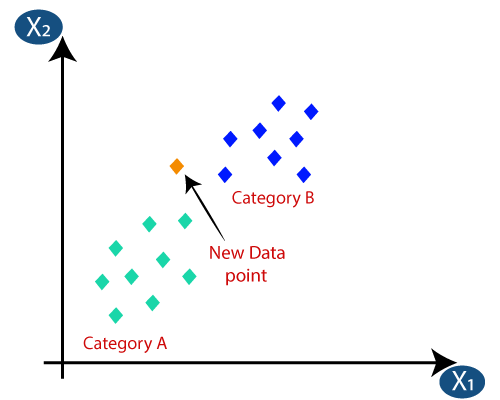

The idea of kNN is simple: we assign the class of an unknown point to the class of its nearest neighbor. In the k nearest neighbor situation, the point is assigned to the class of its most common k neighbors, using Euclidean distance. Essentially, for each point to be predicted, we compute the distance of all n neighbors in the training set. We therefore need O(n) to check all training points when k=1, and O(n+nlogn) to check all points and also sort the distance when k > 1.

In [2]:
#calculate euclidean distance for two vectors
def euclidean_distance(v1,v2):
    return float(math.sqrt(np.sum((v1 - v2)**2)))

#get a list of k nearest neighbors
def neighbors(x,train_data,k):
    distances=[]
    #compute all distances from x to each data point and store in a list
    train_patient_number=train_data.shape[0]
    for i in range(train_patient_number):
        train_data_id=train_data.loc[i][0]
        train_data_point=train_data.loc[i][1:].astype(float).values
        distances.append((train_data_id,euclidean_distance(x,train_data_point)))
    #sort the list based on the distances
    distances.sort(key=lambda pair:pair[1])
    results=[]
    #keep the k smallest distances and store the data points
    for i in range (k):
        results.append(distances[i][0])
    return results

#get the best vote for k
def kNN(x,train_data,k):
    assert k <= train_data.shape[0],'k out of range'
    #get k nearest neighbors 
    k_neighbors=neighbors(x,train_data,k)
    #in case of equal vote, make k-=1
    if k_neighbors.count(4) == k_neighbors.count(2):
        k_neighbors=neighbors(x,train_data,k-1)
    #get the best vote for these k neighbors
    result=max(k_neighbors,key=k_neighbors.count)
    return result

#calculate performances of each k
def performance(k):
    TP,TN,FP,FN=0,0,0,0
    test_patient_number=test_data.shape[0]
    for i in range (test_patient_number):
        answer=test_data.loc[i][0]
        test_data_point=test_data.loc[i][1:].astype(float).values
        prediction=kNN(test_data_point,train_data,k)
        if answer == 4 and prediction == 4:
            TP+=1
        elif answer == 4 and prediction == 2:
            FN += 1
        elif answer == 2 and prediction == 4:
            FP += 1
        elif answer == 2 and prediction == 2:
            TN +=1   
    return {'Accuracy':str(format((TP+TN)/(TP+TN+FP+FN),'.2f')),'Precision':str(format(TP/(TP+FP),'.2f')),'Recall':str(format(TP/(TP+FN),'.2f'))}


In [3]:
#split the data into training and testing 
#and also make the first column of data (ID number) as the result (category 2 or 4)

train_data=data.iloc[:601,:10]
train_result=data.iloc[:601,10:]
test_data=data.iloc[601:,:10]
test_result=data.iloc[601:,10:]
train_data.iloc[:,0]=train_result.iloc[:,0]
test_data.iloc[:,0]=test_result.iloc[:,0]
test_data.index = np.arange(0, len(test_data) )
mink=1
maxk=11

for k in range (mink,maxk):
    results=performance(k)
    print("k =",k,"\t",results)


k = 1 	 {'Accuracy': '0.99', 'Precision': '1.00', 'Recall': '0.93'}
k = 2 	 {'Accuracy': '0.99', 'Precision': '1.00', 'Recall': '0.93'}
k = 3 	 {'Accuracy': '0.98', 'Precision': '0.93', 'Recall': '0.93'}
k = 4 	 {'Accuracy': '0.98', 'Precision': '0.93', 'Recall': '0.93'}
k = 5 	 {'Accuracy': '0.98', 'Precision': '0.93', 'Recall': '0.93'}
k = 6 	 {'Accuracy': '0.98', 'Precision': '0.93', 'Recall': '0.93'}
k = 7 	 {'Accuracy': '1.00', 'Precision': '1.00', 'Recall': '1.00'}
k = 8 	 {'Accuracy': '1.00', 'Precision': '1.00', 'Recall': '1.00'}
k = 9 	 {'Accuracy': '1.00', 'Precision': '1.00', 'Recall': '1.00'}
k = 10 	 {'Accuracy': '1.00', 'Precision': '1.00', 'Recall': '1.00'}


## Reflection 
We can see that for this dataset, performance can be improved by increasing the value of k.
<br>
<br>
Interestingly, the higher the hyperparameter k, the less influence of single noisy points are on the prediction, and we can increase k without increasing the running time. Cross validation and boot strapping could be used to explore the best k, distance functions and possible weights of each feature.

## Naive Bayes Classifier

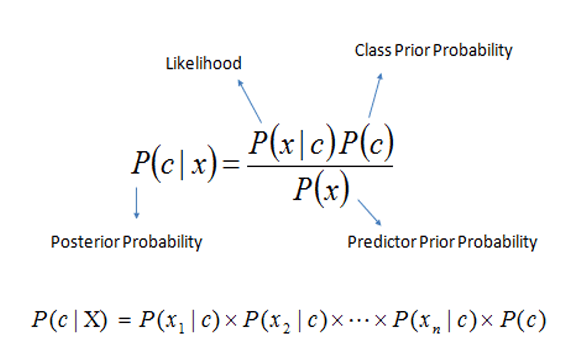

In our case, P(c|x) is the probability of the data point belonging to a certain class, given the data; 

P(x|c) is the probability of observing the data, given the class; P(c) is the probability to observe a certain class in the whole dataset;

P(x) is the probability to observe data point x in the whole dataset.

We therefore compute P(c|x) for each class and assign the data point to the class that maximizes this probability.

In [4]:
"""
this function first split training data into class 2 and class 4, 
and for each class, we calculate for each of nine features, the 
likelihood of having a specific value (of 1-10), and record the 
result into a summary table, where column is the feature name, row 
index is the value, and each entry is the probability of getting this
value under this feature.

"""

def counter(train_data):
    #partition data into class_2 benign and class_4
    class_2=train_data[train_data.iloc[:,0]==2]
    class_4=train_data[train_data.iloc[:,0]==4]
    #creat dataframe that stores probability of values 1-10 for each feature
    data={"clump thickness":list([0]*10),
     "uniformity of cell size":list([0]*10),
     "uniformity of cell shape":list([0]*10),
     "marginal adhesion":list([0]*10),
     "single eputhelial cell size":list([0]*10),
     "bare nuclei":list([0]*10),
     "bland chromatin":list([0]*10),
     "normal nucleoli":list([0]*10),
     "mitoses":list([0]*10)}
    class_2_counts,class_4_counts=pd.DataFrame(data,index=np.arange(1,11)),pd.DataFrame(data,index=np.arange(1,11))
    #count and record probability, i is value 1-10 and j is catergory, adding pseudocount of 1
    for i in range (10):
        for j in range (9):
            class_2_counts.iloc[i,j]=(list(class_2.iloc[:,j+1].values).count(i+1)+1)/class_2.shape[0]
            class_4_counts.iloc[i,j]=(list(class_4.iloc[:,j+1].values).count(i+1)+1)/class_4.shape[0]
    return class_2_counts,class_4_counts
print("Probability summary For class 2: (the probability of having the row index value for each feature)")
counter(train_data)[0]


Probability summary For class 2: (the probability of having the row index value for each feature)


,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single eputhelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
1,0.311170,0.827128,0.773936,0.821809,0.114362,0.867021,0.303191,0.872340,0.976064
2,0.109043,0.085106,0.125000,0.090426,0.784574,0.050532,0.343085,0.077128,0.018617
3,0.196809,0.069149,0.069149,0.061170,0.063830,0.039894,0.316489,0.029255,0.007979
4,0.156915,0.021277,0.026596,0.015957,0.021277,0.013298,0.021277,0.005319,0.002660
5,0.194149,0.002660,0.005319,0.013298,0.015957,0.026596,0.013298,0.007979,0.005319
6,0.037234,0.002660,0.007979,0.010638,0.005319,0.002660,0.002660,0.010638,0.002660
7,0.002660,0.005319,0.007979,0.002660,0.007979,0.005319,0.018617,0.007979,0.005319
8,0.013298,0.005319,0.005319,0.002660,0.005319,0.007979,0.002660,0.010638,0.002660
9,0.002660,0.005319,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660
10,0.002660,0.002660,0.002660,0.005319,0.005319,0.010638,0.002660,0.002660,0.002660


In [5]:
print("Probability summary For class 4:")
counter(train_data)[1]

Probability summary For class 4:


,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single eputhelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
1,0.017778,0.022222,0.013333,0.133333,0.008889,0.062222,0.013333,0.186667,0.564444
2,0.022222,0.040000,0.035556,0.097778,0.097778,0.040000,0.035556,0.026667,0.120000
3,0.053333,0.115556,0.106667,0.120000,0.186667,0.057778,0.164444,0.142222,0.120000
4,0.044444,0.137778,0.133333,0.120000,0.173333,0.057778,0.142222,0.066667,0.057778
5,0.177778,0.137778,0.137778,0.075556,0.137778,0.080000,0.128889,0.080000,0.026667
6,0.084444,0.111111,0.115556,0.084444,0.173333,0.017778,0.040000,0.075556,0.017778
7,0.097778,0.075556,0.120000,0.057778,0.031111,0.035556,0.271111,0.062222,0.035556
8,0.177778,0.111111,0.111111,0.102222,0.088889,0.084444,0.124444,0.093333,0.035556
9,0.066667,0.026667,0.035556,0.022222,0.013333,0.044444,0.053333,0.071111,0.004444
10,0.302222,0.266667,0.235556,0.231111,0.133333,0.564444,0.071111,0.240000,0.062222


In [16]:
"""
we now build naive_bayes classifier that uses the summary table to compute which 
class maximizes the posterior probability, namely, the class that the data point
should be assigned to.
"""
def naive_bayes(test_data):
    class_2_counts,class_4_counts=counter(train_data)
    #split the dataset into class 2 and class 4 like before
    class_2=train_data[train_data.iloc[:,0]==2]
    class_4=train_data[train_data.iloc[:,0]==4]
    result=[]
    for i in range (test_data.shape[0]):
        #initialize probability of being class 2 or 4
        P2_likelihood,P4_likelihood=1,1
        #now multiply the probabilities for each of the 9 values
        for j in range (1,10):
            value=test_data.iloc[i,j]
            P2_likelihood*=class_2_counts.iloc[value-1,j-1]
            P4_likelihood*=class_4_counts.iloc[value-1,j-1]
        #if posterior probability under class 2 is higher,assign point to class 2
        P2_posterior=P2_likelihood*class_2.shape[0]/(class_2.shape[0]+class_4.shape[0])
        P4_posterior=P4_likelihood*class_4.shape[0]/(class_2.shape[0]+class_4.shape[0])
        if P2_posterior > P4_posterior:
            decision=2
        #otherwise assign point to class 4
        else:
            decision=4
        result.append(decision)
    
    return result

def naive_bayes_performance(test_data):
    result=naive_bayes(test_data)
    TP,TN,FP,FN=0,0,0,0
    for i in range (len(result)):
        answer,prediction=test_data.iloc[i,0],result[i]
        if answer == 4 and prediction == 4:
            TP+=1
        elif answer == 4 and prediction == 2:
            FN += 1
        elif answer == 2 and prediction == 4:
            FP += 1
        elif answer == 2 and prediction == 2:
            TN +=1   
    result_dict={'Accuracy':str(format((TP+TN)/(TP+TN+FP+FN),'.2f')),'Precision':str(format(TP/(TP+FP),'.2f')),'Recall':str(format(TP/(TP+FN),'.2f'))}
    print("Performace of Naive Bayes prediction")
    print(result_dict)

naive_bayes_performance(test_data)

Performace of Naive Bayes prediction
{'Accuracy': '0.98', 'Precision': '0.88', 'Recall': '1.00'}


## Reflection

1: For this method, it is better in recovering all true positives, however, allowing more false positives.

2: To avoid the advent of 0 probability that makes the final multiplied product to be also 0, one should add 1 pseudocount in each feature of each data point.

## 3: Neural Network

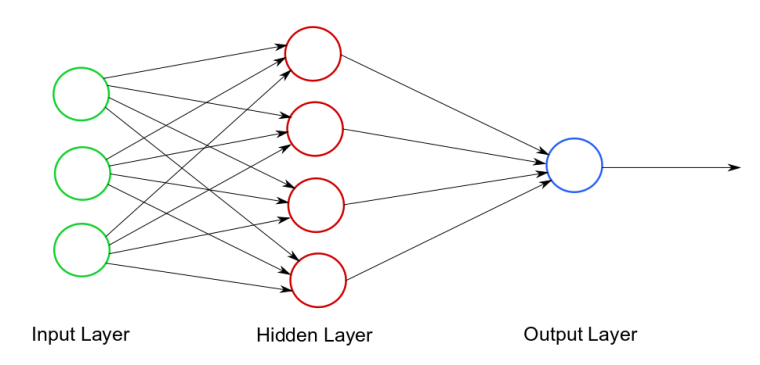

By universal approximation theorem, a feedforward network with a single layer can represent all continous functions (although the layer can be too large to learn and generalize effectively).

Our neural network contains an input layer, 2 hidden layers of five neurons, and an output layer of one neurons. Sigmoid activation function is used throughout the layers, and cross entropy loss is used as the loss function. Each neuron has its weight, initialized as a random number in between 0 and 1, and bias, initialized as 0. 

A sigmoid function looks like this:
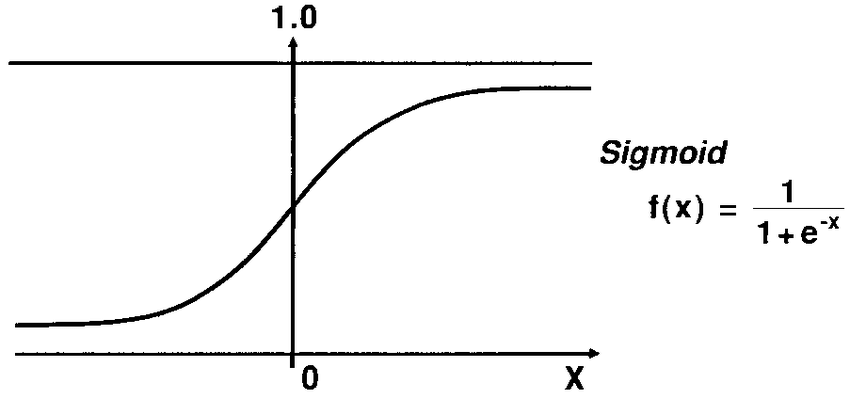



And a cross entropy loss function looks like this:
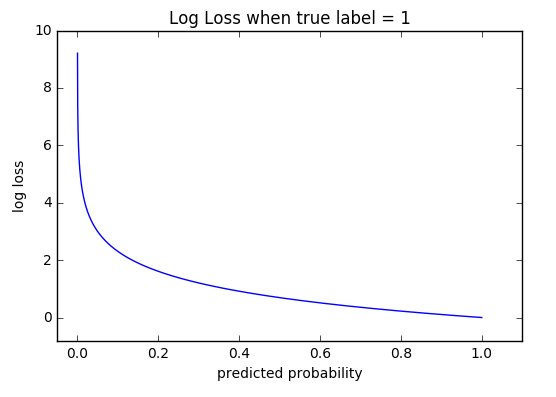

The neural network can do two things: feedforward (to predict) and back propagation (to train).

### Feedforward:

$Z_1=X ∙  w_1 + b_1$
<br>
<br>
$a_1=\sigma (z_1)$
<br>
<br>
$Z_2=a_1∙w_2+b_2$
<br>
<br>
$a_2=\sigma (z_2)$
<br>
<br>
$Z_3=a_2∙w_3+b_3$
<br>
<br>
$\hat{y}=\sigma (z_3)$
<br>
<br>
$L=-\frac{1}{m}\Sigma_{i=1}^{m}y log(\hat{y})+(1-y)log(1-\hat{y})$
<br>

where Z is linear feedforward, a is activation feedforward, X is input, L is loss function, $\sigma$ is sigmoid function, y is true value and $\hat{y}$ is predicted output.
<br>

### Back Propagation

$\frac{dL}{dw_3}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{dw_3}$
<br>
<br>
$\frac{dL}{dw_3}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{db_3}$
<br>
<br>
$\frac{dL}{dw_2}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{dw_2}$
<br>
<br>
$\frac{dL}{dw_2}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{db_2}$
<br>
<br>
$\frac{dL}{dw_2}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{dw_1}$
<br>
<br>
$\frac{dL}{dw_2}=\frac{dL}{d\hat{y}}\frac{d\hat{y}}{dz_3}\frac{dz_3}{da_2}\frac{da_2}{dz_2}\frac{dz_2}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{db_1}$
<br>
<br>

We then can update our parameters with these gradients using gradient descent to train our model.

Same as with kNN, the first 600 patients are used for training and the rest are used for testing.

for iteration # 0
Loss: 
1.5787027527750792


for iteration # 500
Loss: 
0.6472988995082145


for iteration # 1000
Loss: 
0.6471980636065294


for iteration # 1500
Loss: 
0.6468280853473993


for iteration # 2000
Loss: 
0.2345979560540789


for iteration # 2500
Loss: 
0.0763030053255899


for iteration # 3000
Loss: 
0.07222069384190456




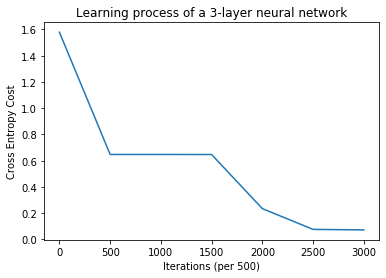

In [7]:
#define cost function as cross-entropy loss
def Cost (y,yhat):
    #m is number of samples
    m = y.shape[1]
    cost = (np.dot(y, np.log(yhat).T) + np.dot(1-y, np.log(1-yhat).T)) / -m 
    cost = np.squeeze(cost) 
    return cost

#derivative of the cost function
def Cost_d(y,yhat):
    m=y.shape[1]
    cost= -(np.divide(y, yhat) - np.divide(1 - y, 1 - yhat))
    return cost

#sigmoid activation function for all layers
def Sigmoid(x):
    return 1/(1+np.exp(-x))

#derivative of sigmoid function
def Sigmoid_d(z):
    return z*(1-z)

#our neural net with five neurons in each of two layers
class MyNeuralNet:
    def __init__(self,X,y):
        #setting learning rate, weights (between 0 and 1) and bias (0)
        self.lr=0.4
        self.input=X
        self.w1=np.random.rand(5,self.input.shape[0])
        self.b1=np.zeros((5,1))
        self.w2=np.random.rand(5,5)
        self.b2=np.zeros((5,1))
        self.w3=np.random.rand(1,5)
        self.b3=np.zeros((1,1))
        self.y=y
        self.yhat= np.zeros((self.y.shape[1],1))
    
    def feedforward(self,X,y):
        self.z1=np.dot(self.w1,self.input)+self.b1
        self.a1=Sigmoid(self.z1)
        
        self.z2=np.dot(self.w2,self.a1)+self.b2
        self.a2=Sigmoid(self.z2)
        
        self.z3=np.dot(self.w3,self.a2)+self.b3
        self.yhat=Sigmoid(self.z3)
         
        return self.yhat
        
    def backprop(self):
        #use chain rule to compute derivative of w and b
        dL_dyhat=Cost_d(self.y,self.yhat)
        dyhat_dz3=Sigmoid_d(self.yhat)  
        dL_dz3=dL_dyhat*dyhat_dz3
        dL_dz2=np.dot(self.w3.T,dL_dz3)*Sigmoid_d(self.a2)
        dL_dz1=np.dot(self.w2.T,dL_dz2)*Sigmoid_d(self.a1)

                     
        dL_dw3=np.dot(dL_dz3,self.a2.T)
        dL_db3=np.sum(dL_dz3,axis=1,keepdims=True)
        
        dL_dw2=np.dot(dL_dz2,self.a1.T)
        dL_db2=np.sum(dL_dz2,axis=1,keepdims=True)
        
        dL_dw1=np.dot(dL_dz1,self.input.T)
        dL_db1=np.sum(dL_dz1,axis=1,keepdims=True)
        
        #now update the parameter
        m=self.y.shape[1]
        self.w1 -= self.lr*dL_dw1/m
        self.b1 -= self.lr*dL_db1/m
        self.w2 -= self.lr*dL_dw2/m
        self.b2 -= self.lr*dL_db2/m
        self.w3 -= self.lr*dL_dw3/m
        self.b3 -= self.lr*dL_db3/m
    
    def train(self,X,y):
        self.output=self.feedforward(X,y)
        self.backprop()
        
    def predict(self,X):
        self.z1=np.dot(self.w1,X)+self.b1
        self.a1=Sigmoid(self.z1)
        
        self.z2=np.dot(self.w2,self.a1)+self.b2
        self.a2=Sigmoid(self.z2)
        
        self.z3=np.dot(self.w3,self.a2)+self.b3
        self.yhat=Sigmoid(self.z3)
        
        #if the prediction is less than 0.5 then result is class 0, else result is class 1
        self.yhat[self.yhat<0.5]=0
        self.yhat[self.yhat>=0.5]=1
        

        return self.yhat

#process the same dataset in the same way    
data=pd.read_csv('breast-cancer-wisconsin-modified.data',header=None)
X=np.array(data.iloc[:,1:10], dtype=float)
y=np.array(data.iloc[:,10], dtype=float)
#change y from 2 or 4 to 0 or 1
y[y==2],y[y==4]=0,1

y=y.reshape((y.shape[0],1))
X=X.T
y=y.T

#build neural net and start training 
NN=MyNeuralNet(X,y)

iterations=[]
loss=[]
for i in range(3001): # trains the NN 
    if i % 500 ==0: 
        print ("for iteration # " + str(i))
        lost_value=Cost(y,NN.feedforward(X,y))
        print("Loss: \n"+str(lost_value))
        print ("\n")
        iterations.append(i)
        loss.append(lost_value)
  
    NN.train(X[:,1:601], y[:,1:601])

import matplotlib.pyplot as plt
plt.plot(iterations,loss)
plt.ylabel('Cross Entropy Cost')
plt.xlabel('Iterations (per 500)')
plt.title("Learning process of a 3-layer neural network")
plt.show()


As expected, over the 3000 iterations of training, the loss decreases gradually to a minima.

In [8]:
X_test,y_test=X[:,601:683],y[:,601:683]
result=NN.predict(X_test)
count=0
TP,TN,FP,FN=0,0,0,0
for i in range (y_test.shape[1]):
    answer,prediction=y_test[0,i],result[0,i],
    if answer == 1 and prediction == 1:
        TP+=1
    elif answer == 1 and prediction == 0:
        FN += 1
    elif answer == 0 and prediction == 1:
        FP += 1
    elif answer == 0 and prediction == 0:
        TN +=1   
result_dict={'Accuracy':str(format((TP+TN)/(TP+TN+FP+FN),'.2f')),'Precision':str(format(TP/(TP+FP),'.2f')),'Recall':str(format(TP/(TP+FN),'.2f'))}
print("Performace of our neural network with learning rate of 0.4:")
print(result_dict)



Performace of our neural network with learning rate of 0.4:
{'Accuracy': '1.00', 'Precision': '1.00', 'Recall': '1.00'}


As we can see, the neural network can easily perform a good job on the testing set.

## Reflection

1: There are a lot of caveats when building a neural network that is working. Choosing functions are vital to the performance of neural network, depending on the type of the problem. For binary classification, sigmoid, Relu are among the popular activation functions for hidden layers, whereas sigmoid and softmax (better for multi-class) can be used for output layer. For loss function, cross entropy loss is often used. Using unappropriate functions would easily result in failure, such as vanishing gradient that causes the neural network to stop learning or even predicting all data points to the same category.

2: Once the neural network is built, one has to adjust the hyperparameters with trial and error in order to get better performance. This include number of neurons in each layer (having a lot of neurons does not improve performance dramatically); choosing an approporiate learning rate or using an adaptive learning rate to avoid overshooting the minima, and choosing the right amout of iterations of training. Therefore it is important to understand how the structure of neural network affects its functions. 

3: It is beneficial to build a neural network class that allow users to define different activation functions, learning rate, number of layers and neurons as well as initialization in order to explore the performance of different structure more efficiently.

## Final Thoughts

1: The dataset is preprocessed and neatly organized (i.e.,all values are nicely normalized in between 1-10), future work should be robust to deal with more realistic datasets that are messier and with missing vallues.

2: As overfitting being a common problem in machine learning, a better way to test the performace of the algorithm is to use another dataset that is separately collected, when such a dataset is possible to have access to.

3: There are other efficient algorithms for similar problem, such as support vector machine, decision tree, etc.

4: One should note the implication of the results, namely, correlation is not equal to causation.